In [2]:
# Might need to install dependencies
# pip install tensorflow==1.15.0

citations: 
* https://www.kaggle.com/amarpreetsingh/stock-prediction-lstm-using-keras
* https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html
* https://pythonprogramming.net/recurrent-neural-network-deep-learning-python-tensorflow-keras/
* https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
* https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470
* https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046

In [3]:
# Library for manipulating, formatting, and cleaning the data
import pandas as pd

In [4]:
# Load the csv into a data frame
data = pd.read_csv('./input/all_stocks_5yr.csv')

In [5]:
# See what we have
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.6300,14.75,8407500,AAL
1,2013-02-11,14.89,15.0100,14.2600,14.46,8882000,AAL
2,2013-02-12,14.45,14.5100,14.1000,14.27,8126000,AAL
3,2013-02-13,14.30,14.9400,14.2500,14.66,10259500,AAL
4,2013-02-14,14.94,14.9600,13.1600,13.99,31879900,AAL
5,2013-02-15,13.93,14.6100,13.9300,14.50,15628000,AAL
6,2013-02-19,14.33,14.5600,14.0800,14.26,11354400,AAL
7,2013-02-20,14.17,14.2600,13.1500,13.33,14725200,AAL
8,2013-02-21,13.62,13.9500,12.9000,13.37,11922100,AAL
9,2013-02-22,13.57,13.6000,13.2100,13.57,6071400,AAL


In [6]:
# (data['Name']=='MMM') returns true/false
# .close says let's just select the column
closeData = data[data['Name']=='MMM'].close

In [7]:
# here is what is in the close array
closeData

380126    102.66
380127    102.62
380128    103.46
380129    102.86
380130    102.78
380131    103.23
380132    104.18
380133    103.15
380134    102.72
380135    103.54
380136    101.75
380137    102.31
380138    103.57
380139    104.00
380140    103.77
380141    103.28
380142    104.45
380143    104.66
380144    104.54
380145    105.71
380146    105.81
380147    105.13
380148    105.09
380149    106.02
380150    106.40
380151    105.41
380152    105.18
380153    105.66
380154    104.94
380155    106.42
           ...  
381355    235.45
381356    236.20
381357    235.72
381358    235.37
381359    235.64
381360    235.63
381361    238.71
381362    240.57
381363    239.79
381364    241.28
381365    241.14
381366    242.31
381367    244.47
381368    244.74
381369    248.11
381370    245.91
381371    248.18
381372    247.30
381373    246.31
381374    247.69
381375    252.36
381376    258.63
381377    256.01
381378    251.54
381379    250.50
381380    247.94
381381    245.17
381382    231.

**Now we begin to shape the data for our RNN**

In [8]:
# Allows us to reshape data, format nicely
import numpy as np

In [9]:
# Allows us to normalize the data
# All values will now be between 0 and 1
from sklearn.preprocessing import MinMaxScaler

Adding these "type" lines of code to better understand the transformation of data types
https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [10]:
type(closeData)

pandas.core.series.Series

In [11]:
type(closeData.values)

numpy.ndarray

In [12]:
closeData.shape

(1259,)

In [13]:
closeData = closeData.values.reshape(closeData.shape[0], 1)

In [14]:
scl = MinMaxScaler()
closeData = scl.fit_transform(closeData)
closeData.shape

(1259, 1)

In [15]:
# NOW we have one column with 1259 rows
closeData

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [16]:
closeData.shape

(1259, 1)

- Next step is to preprocess the data
- Must format it into the shape of our input layer
- Splitting into chunks of 7 (week)

In [17]:
# This code is too similar to one of the citations
# Will need to fix/try my own process in the next Sprint
# Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [18]:
X,y = processData(closeData,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


# Model Creation

In [19]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

Using TensorFlow backend.


In [1]:
#Build the model
model = Sequential()
model.add(LSTM(10,input_shape=(7,1)))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse', metrics=['acc'])

#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

NameError: name 'Sequential' is not defined

In [58]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1100 - val_loss: 0.4791
Epoch 2/200
1000/1000 [==============================] - 0s 332us/step - loss: 0.0344 - val_loss: 0.2076
Epoch 3/200
1000/1000 [==============================] - 0s 335us/step - loss: 0.0165 - val_loss: 0.0983
Epoch 4/200
1000/1000 [==============================] - 0s 332us/step - loss: 0.0193 - val_loss: 0.0847
Epoch 5/200
1000/1000 [==============================] - 0s 327us/step - loss: 0.0151 - val_loss: 0.0672
Epoch 6/200
1000/1000 [==============================] - 0s 327us/step - loss: 0.0139 - val_loss: 0.0505
Epoch 7/200
1000/1000 [==============================] - 0s 332us/step - loss: 0.0116 - val_loss: 0.0319
Epoch 8/200
1000/1000 [==============================] - 0s 328us/step - loss: 0.0103 - val_loss: 0.0202
Epoch 9/200
1000/1000 [==============================] - 0s 329us/step - loss: 0.0078 - val_loss: 0.0134
Epoch 10/2

1000/1000 [==============================] - 0s 319us/step - loss: 9.2680e-04 - val_loss: 0.0013
Epoch 152/200
1000/1000 [==============================] - 0s 282us/step - loss: 8.0469e-04 - val_loss: 0.0031
Epoch 153/200
1000/1000 [==============================] - 0s 306us/step - loss: 8.1306e-04 - val_loss: 0.0012
Epoch 154/200
1000/1000 [==============================] - 0s 287us/step - loss: 7.5778e-04 - val_loss: 0.0024
Epoch 155/200
1000/1000 [==============================] - 0s 315us/step - loss: 7.1716e-04 - val_loss: 0.0014
Epoch 156/200
1000/1000 [==============================] - 0s 338us/step - loss: 7.7398e-04 - val_loss: 0.0025
Epoch 157/200
1000/1000 [==============================] - 0s 349us/step - loss: 8.5653e-04 - val_loss: 0.0013
Epoch 158/200
1000/1000 [==============================] - 0s 296us/step - loss: 8.0777e-04 - val_loss: 0.0032
Epoch 159/200
1000/1000 [==============================] - 0s 328us/step - loss: 9.5090e-04 - val_loss: 0.0011
Epoch 160/200
1

# Plotting Loss function for model

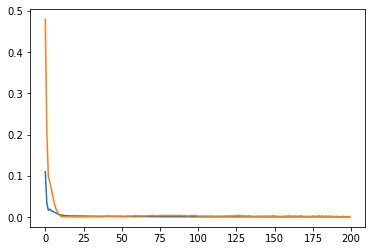

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [60]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

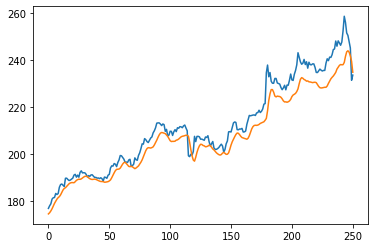

In [61]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [64]:
act = []
pred = []
for i in range(250):
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[174.72195]], actual:[[177.07]]
predicted:[[175.23495]], actual:[[178.18]]
predicted:[[175.99069]], actual:[[179.]]
predicted:[[176.92311]], actual:[[181.02]]
predicted:[[178.0423]], actual:[[181.6]]
predicted:[[179.19687]], actual:[[181.7]]
predicted:[[180.10077]], actual:[[183.41]]
predicted:[[180.99509]], actual:[[182.95]]
predicted:[[181.62909]], actual:[[183.37]]
predicted:[[182.07549]], actual:[[186.04]]
predicted:[[182.80995]], actual:[[187.19]]
predicted:[[183.85759]], actual:[[187.41]]
predicted:[[184.87949]], actual:[[186.91]]
predicted:[[185.54088]], actual:[[186.35]]
predicted:[[185.84485]], actual:[[189.86]]
predicted:[[186.42303]], actual:[[189.89]]
predicted:[[187.00607]], actual:[[189.31]]
predicted:[[187.54047]], actual:[[188.9]]
predicted:[[187.8672]], actual:[[189.09]]
predicted:[[188.00961]], actual:[[189.51]]
predicted:[[188.01892]], actual:[[189.9]]
predicted:[[187.95499]], actual:[[191.21]]
predicted:[[188.38841]], actual:[[191.52]]
predicted:[[188.981

predicted:[[238.02734]], actual:[[247.69]]
predicted:[[238.0692]], actual:[[252.36]]
predicted:[[239.02623]], actual:[[258.63]]
predicted:[[241.59111]], actual:[[256.01]]
predicted:[[243.51001]], actual:[[251.54]]
predicted:[[243.9785]], actual:[[250.5]]
predicted:[[243.39487]], actual:[[247.94]]
predicted:[[241.80542]], actual:[[245.17]]
predicted:[[239.53383]], actual:[[231.44]]


In [54]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [55]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [56]:
X_test[248]

array([[0.93026517],
       [0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875]])